# PyTorch Workflow Fundamentals

## Data

In [65]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [66]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

In [67]:
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [68]:
train_split = int(0.8 * len(X)) # 80% treino e 20% teste

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [69]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # training data blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # test data green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

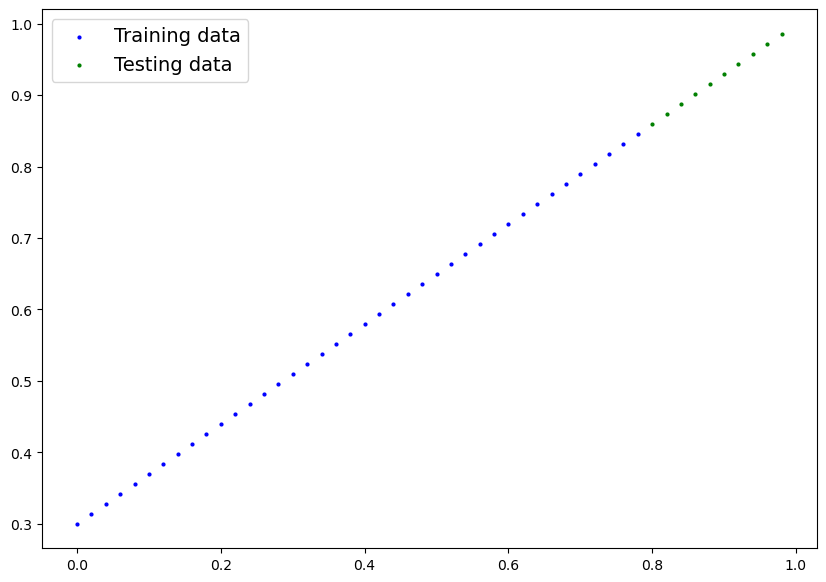

In [70]:
plot_predictions()

## Model

Em Pytorch:

- nn.Module: contém os blocos de construção maiores (camadas)
  
- nn.Parameter: contém os parâmetros menores, como pesos e vieses 
  
- forward(): informa aos blocos maiores como fazer cálculos em entradas dentro de nn.Module(s)
  
- torch.optim: contém métodos de otimização sobre como melhorar os parâmetros nn.Parameter para melhor representar os dados de entrada

In [71]:
class LinearRegressionModel(nn.Module): # classe herda nn.Module do Pytorch
    def __init__(self):
        super().__init__() # chama construtor da classe-mãe para que tudo funcione corretamente
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) # começa com pesos aleatórios e pode atualizar com gradiente descendente
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) # começa com viés aleatórios e pode atualizar com gradiente descendente

    def forward(self, x: torch.Tensor) -> torch.Tensor: # input e output é um tensor torch
        return self.weights * x + self.bias

In [72]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [73]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [74]:
with torch.inference_mode():
    y_preds = model_0(X_test)

print(f"Valores preditos:\n{y_preds}")

Valores preditos:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


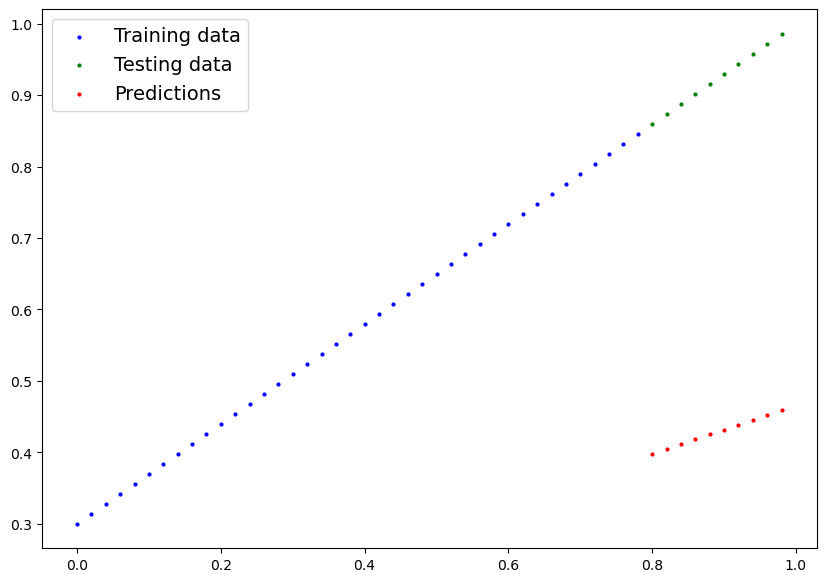

In [75]:
plot_predictions(predictions=y_preds)

In [76]:
y_test - y_preds # demonstra o quão ruim está o modelo

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

## Train Model

In [77]:
loss_function = nn.L1Loss() # L1loss == MAE

# otimizador
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr = learning rate (o quao muda os parametros em cada step)

### Training Loop

In [78]:
torch.manual_seed(42)

epochs = 150

train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_function(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step() # atualiza os pesos com SGD

    # testando
    model_0.eval()
    with torch.inference_mode():

        test_pred = model_0(X_test)


        test_loss = loss_function(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

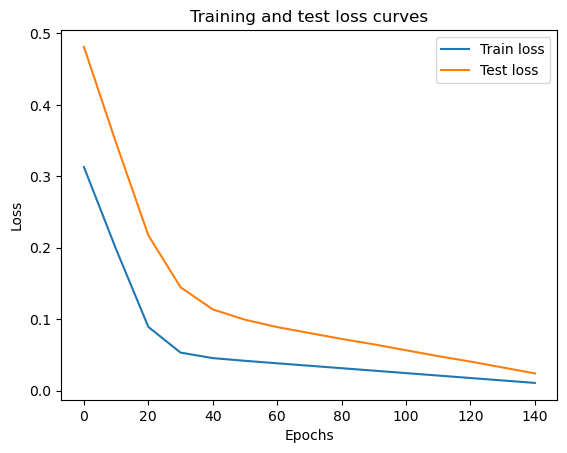

In [79]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Inference

In [80]:
model_0.eval() # modelo em modo avaliação

with torch.inference_mode():
  y_preds = model_0(X_test)
  
y_preds

tensor([[0.8464],
        [0.8596],
        [0.8729],
        [0.8862],
        [0.8995],
        [0.9127],
        [0.9260],
        [0.9393],
        [0.9526],
        [0.9659]])

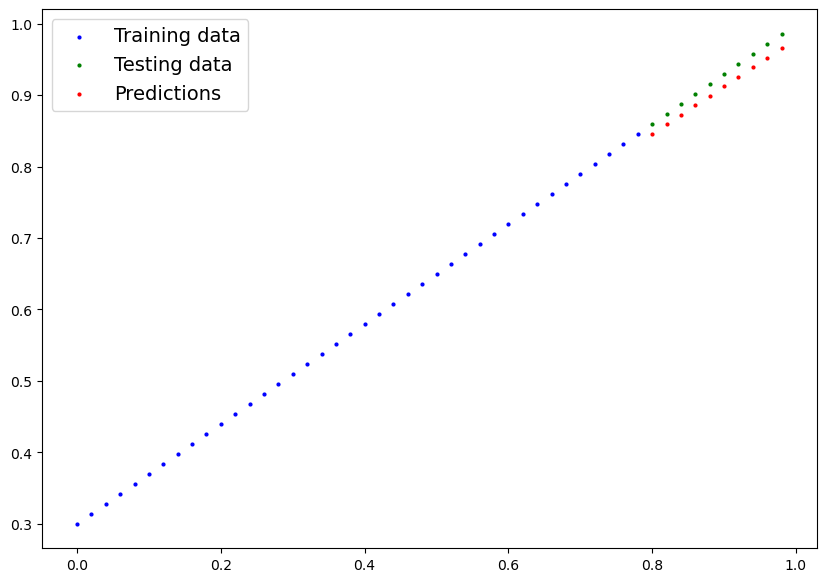

In [81]:
plot_predictions(predictions=y_preds)

## Saving Model

In [82]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth
